# Classificador de Spam

### Autor: Gustavo Rodrigues Ribeiro

### Descrição: Esta aplicação utiliza um modelo de Machine Learning em Python que classifica mensagens como "spam" ou "não spam". Utilizando o conjunto de dados público "SMS Spam Collection Dataset" disponível no Kaggle (https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset).

## Importação dos Dados

Primeiramente devemos importar o Dataset desejado. Assim, utilizamos a Kaggle API para realizar a importação diretamente do banco de dados da plataforma.

In [ ]:
# Importando o Dataset (última versão) via kaggle API
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Caminho para os arquivos do Dataset:", path)
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding="latin1")

Caminho para os arquivos do Dataset: /kaggle/input/sms-spam-collection-dataset


## Impotação das Bibliotecas

Importando as bibliotecas necessárias para a manipulação dos dados e treinamento de máquina para a geração do modelo.

In [ ]:
# Bibliotecas
import joblib
import numpy as np
import pandas as pd
import random
import os
import re
from wordcloud import WordCloud
from collections import Counter

# Visualização dos Dados e Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Natural Language Processing (NLP)
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

nltk.download('wordnet')
!unzip /root/nltk_data/corpora/wordnet.zip -d /root/nltk_data/corpora/

!pip install wordcloud

# Extração de Features e Vetorização
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# Treinamento e avaliação do modelo
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Modelos de Aprendizado de Máquina
from sklearn.naive_bayes import MultinomialNB

# Balanceamento de Classe
from imblearn.over_sampling import SMOTE

# Variáveis Globais de SEED
SEED = 42
np.random.seed(SEED)
random.seed(SEED)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Archive:  /root/nltk_data/corpora/wordnet.zip
   creating: /root/nltk_data/corpora/wordnet/
  inflating: /root/nltk_data/corpora/wordnet/lexnames  
  inflating: /root/nltk_data/corpora/wordnet/data.verb  
  inflating: /root/nltk_data/corpora/wordnet/index.adv  
  inflating: /root/nltk_data/corpora/wordnet/adv.exc  
  inflating: /root/nltk_data/corpora/wordnet/index.verb  
  inflating: /root/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /root/nltk_data/corpora/wordnet/data.adj  
  inflating: /root/nltk_data/corpora/wordnet/index.adj  
  inflating: /root/nltk_data/corpora/wordnet/LICENSE  
  inflating: /root/nltk_data/corpora/wordnet/citation.bib  
  inflating: /root/nltk_data/corpora/wordnet/noun.exc  
  inflating: /root/nltk_data/corpora/wordnet/verb.exc  
  inflating: /root/nltk_data/corpora/wordnet/README  
  inflating: /root/nltk_data/corpora/wordnet/index.sense  
  inflating: /root/nltk_data/corpora/wordnet/data.noun  
  inflating: /root/nltk_data/corpora/wordnet/data.adv  


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Importação e Análise Inicial dos Dados

Implementação da leitura do dataset "SMS Spam Collection", remoção de colunas desnecessárias, atualização os nomes das colunas para algo mais descritivo, verificação das informações gerais do conjunto de dados, remoção de registros repetidos, transformação das labels em valores numéricos e examinação do equilíbrio entre as categorias.

In [ ]:
print("\n----- Informações do Dataset -----")
print()

df.info()


----- Informações do Dataset -----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
print("\n----- Visão Geral do Dataset -----")
print()
df


----- Visão Geral do Dataset -----



,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
print("\n----- Descrição do Dataset -----")
print()

df.describe()


----- Descrição do Dataset -----



,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Observe que nas colunas 'Unnamed: 2',	'Unnamed: 3' e 'Unnamed: 4', temos apenas 68 campos não nulos no total, o que é cerca de 1,2% de todo o Dataset. Assim, podemos descartar essas colunas, sem que o processo tenha interferência.



In [ ]:
# Mantemos apenas as colunas relevantes v1 e v2, e as renomeamos para 'label' e 'message'
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Aqui convertemos as labels para o formato numérico onde: 'ham' = 0 e 'spam' = 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

<ipython-input-6-3828e4d61eca>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [ ]:
# Remoção das duplicatas
df.drop_duplicates(inplace=True)

<ipython-input-8-827c40b10fde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [ ]:
print("\n----- Dataset -----")
print()

df


----- Dataset -----



,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
# Visualizaremos a distribuição das labels no Dataset
count = df['label'].value_counts()
print(count)

label
0    4516
1     653
Name: count, dtype: int64


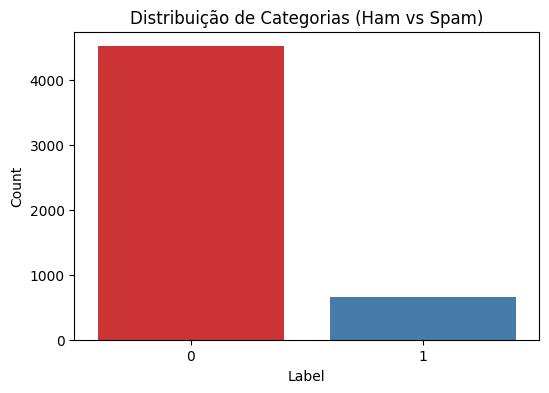

In [ ]:
# Visualizaremos a distribuição das labels no Dataset em um gráfico
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label', palette='Set1')
plt.title("Distribuição de Categorias (Ham vs Spam)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


([<matplotlib.patches.Wedge at 0x7c2d24512110>,
 [Text(-1.014499732282844, 0.4251944181172162, '0'),
  Text(1.0144998708287172, -0.42519408755122207, '1')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

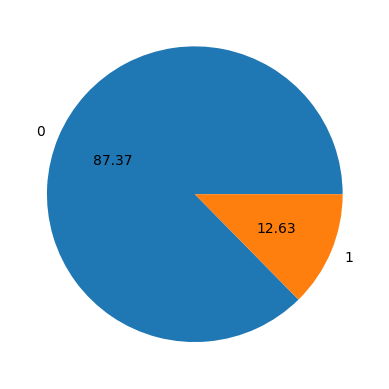

In [ ]:
plt.pie(df['label'].value_counts(),labels=['0','1'],autopct="%0.2f")

## Construção de Variáveis

Esta parte é dedicada à geração de novas informações a partir dos dados existentes, com a finalidade de aumentar a eficiência do modelo.


In [ ]:
# Agora iremos adicionar uma coluna com a quantidade de caracteres, palavras e sentenças em cada 'mensagem'
df["Number_of_Characters"] = df["message"].apply(len)
df["Number_of_Words"] = df.apply(lambda row: word_tokenize(row["message"]), axis=1).apply(len)
df["Number_of_Sentences"] = df.apply(lambda row: sent_tokenize(row["message"]), axis=1).apply(len)


<ipython-input-13-79147a89d8b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Number_of_Characters"] = df["message"].apply(len)
<ipython-input-13-79147a89d8b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Number_of_Words"] = df.apply(lambda row: word_tokenize(row["message"]), axis=1).apply(len)
<ipython-input-13-79147a89d8b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [ ]:
print("\n----- Dataset -----")
print()

df


----- Dataset -----



,label,message,Number_of_Characters,Number_of_Words,Number_of_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [ ]:
print("\n----- Métricas do Dataset -----")
print()

df.describe()


----- Métricas do Dataset -----



,label,Number_of_Characters,Number_of_Words,Number_of_Sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [ ]:
print("\n----- Informações do Dataset -----")
print()

df.info()


----- Informações do Dataset -----

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   label                 5169 non-null   int64 
 1   message               5169 non-null   object
 2   Number_of_Characters  5169 non-null   int64 
 3   Number_of_Words       5169 non-null   int64 
 4   Number_of_Sentences   5169 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.3+ KB


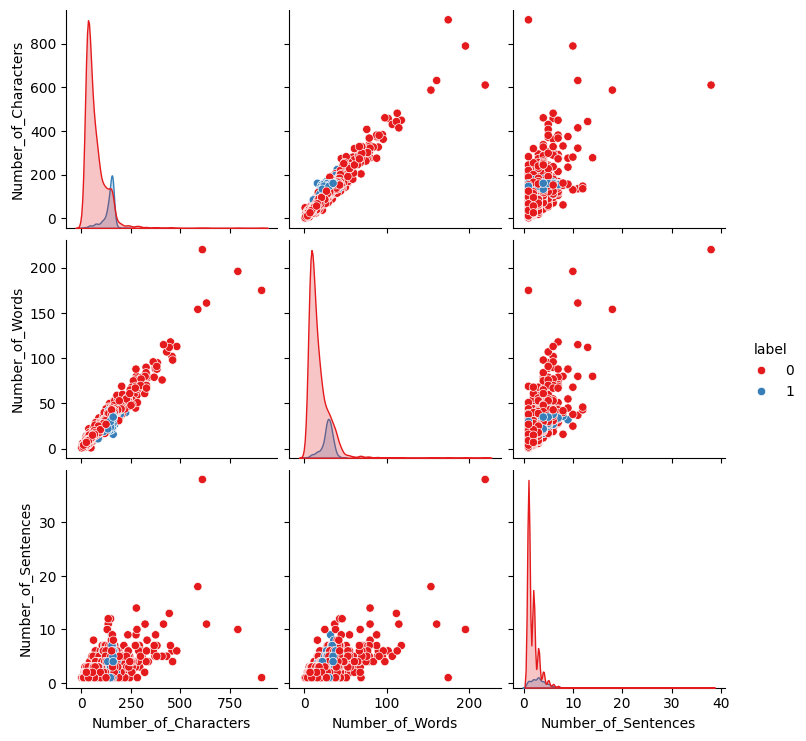

In [ ]:
# Seleciona-se as colunas que serão apresentadas no gráfico
numeric_columns = ['Number_of_Characters', 'Number_of_Words', 'Number_of_Sentences']

# Gráfico com as relações de 'labels' e qtd. de caracteres, palavras e sentenças
sns.pairplot(df[numeric_columns + ['label']], hue='label', palette='Set1')


Para exemplificarmos e localizarmos as principais palavras de cada categoria (Spam e Ham), de forma visual, podemos utilizar uma nuvem de palavras.

In [ ]:
stop_words = set(stopwords.words('english'))

# Contrução de uma nuvem de palavras para mensagens de Spam e Ham
spam_words = ' '.join(df[df['label'] == 1]['message'])
ham_words = ' '.join(df[df['label'] == 0]['message'])

# Remoção de Stopwords para a contrução da nuvem de palavras
spam_words_cleaned = ' '.join([word for word in spam_words.split() if word.lower() not in stop_words])
ham_words_cleaned = ' '.join([word for word in ham_words.split() if word.lower() not in stop_words])

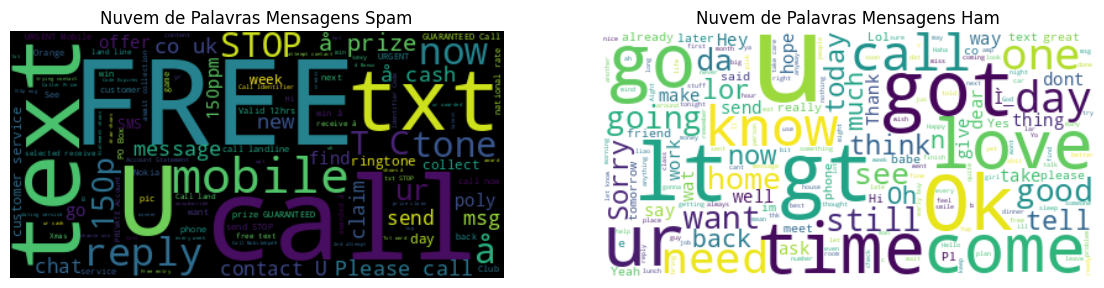

In [ ]:
# Gráfico para a representação da nuvem de palavras construida
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
wordcloud_spam = WordCloud(width=400, height=200, background_color='black').generate(spam_words_cleaned)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title("Nuvem de Palavras Mensagens Spam")

plt.subplot(1, 2, 2)
wordcloud_ham = WordCloud(width=400, height=200, background_color='white').generate(ham_words_cleaned)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis('off')
plt.title("Nuvem de Palavras Mensagens Ham")

plt.show()

Agora, podemos utiizar o CountVectorizer para classificarmos o top 10 de palavras mais usadas nas mensagens das categorias Spam e Ham.

In [ ]:
# Criando o vetorizador para obter o top 10 de palavras utilizadas em Spam e Ham
vectorizer = CountVectorizer(stop_words='english', max_features=10)

# Vetorinzando, ajustando e transformando as palavras de acordo com suas 'labels' (Spam e Ham)
spam_vectorized = vectorizer.fit_transform(df[df['label'] == 1]['message'])
ham_vectorized = vectorizer.fit_transform(df[df['label'] == 0]['message'])

# Coletando o top 10 de palavras utilizadas em Spam e Ham
spam_word_freq = sorted(zip(vectorizer.get_feature_names_out(), spam_vectorized.sum(axis=0).A1), key=lambda x: x[1], reverse=True)
ham_word_freq = sorted(zip(vectorizer.get_feature_names_out(), ham_vectorized.sum(axis=0).A1), key=lambda x: x[1], reverse=True)

# Apresentando o top 10
print("Top palavras SPAM:", spam_word_freq[:10])
print("Top palavras HAM:", ham_word_freq[:10])

Top palavras SPAM: [('good', np.int64(195)), ('ll', np.int64(134)), ('lt', np.int64(119)), ('got', np.int64(109)), ('know', np.int64(109)), ('like', np.int64(108)), ('come', np.int64(96)), ('just', np.int64(96)), ('ok', np.int64(83)), ('gt', np.int64(82))]
Top palavras HAM: [('gt', np.int64(288)), ('lt', np.int64(287)), ('just', np.int64(278)), ('ok', np.int64(255)), ('ll', np.int64(232)), ('got', np.int64(226)), ('know', np.int64(225)), ('like', np.int64(222)), ('good', np.int64(215)), ('come', np.int64(211))]


## Processamento dos Dados

Criação de uma função responsável por limpar os textos das mensagens SMS, convertendo todos os caracteres para minúsculo, retirando símbolos que não sejam letras ou números, ajustando espaços em excesso e removendo espaços no início e no fim. Assim, teremos uma nova coluna com as mensagens já processadas.

Primeiramente, devemos realizar a remoção dos valores discrepantes (Outliers) da nossa base de dados, para que ao gerarmos o modelo, ele seja o mais confiável possível.

In [ ]:
# Função para remover valores discrepantes utilizando o intervalo interquartil (IQR - Interquartile Range)
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

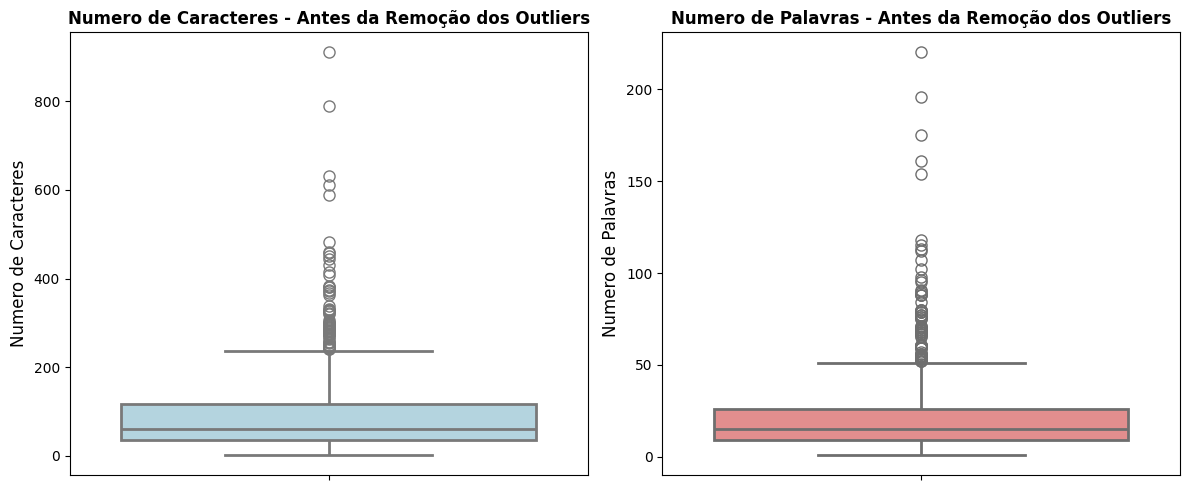

In [ ]:
# Gráfico Box Plot com o número de caracteres e palavras antes da retirada dos Outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=df["Number_of_Characters"], ax=axes[0], color="lightblue", fliersize=8, linewidth=2)
axes[0].set_title("Numero de Caracteres - Antes da Remoção dos Outliers", fontsize=12, fontweight='bold')
axes[0].set_ylabel("Numero de Caracteres", fontsize=12)

sns.boxplot(y=df["Number_of_Words"], ax=axes[1], color="lightcoral", fliersize=8, linewidth=2)
axes[1].set_title("Numero de Palavras - Antes da Remoção dos Outliers", fontsize=12, fontweight='bold')
axes[1].set_ylabel("Numero de Palavras", fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# Removendo os Outliers
df_cleaned = remove_outliers_iqr(df, "Number_of_Characters")
df_cleaned = remove_outliers_iqr(df_cleaned, "Number_of_Words")

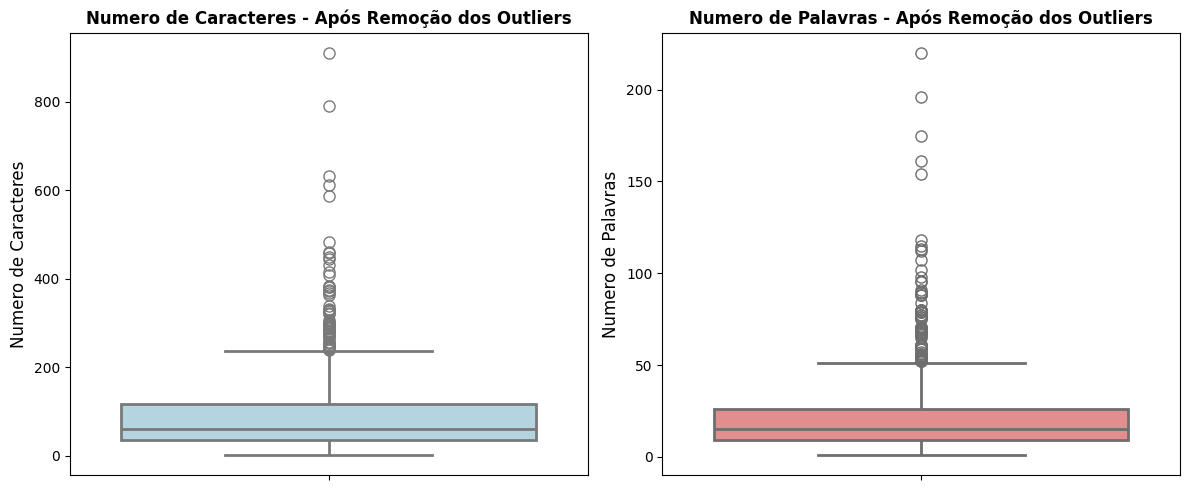

In [ ]:
# Gráfico Box Plot com o número de caracteres e palavras após da retirada dos Outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=df["Number_of_Characters"], ax=axes[0], color="lightblue", fliersize=8, linewidth=2)
axes[0].set_title("Numero de Caracteres - Após Remoção dos Outliers", fontsize=12, fontweight='bold')
axes[0].set_ylabel("Numero de Caracteres", fontsize=12)

sns.boxplot(y=df["Number_of_Words"], ax=axes[1], color="lightcoral", fliersize=8, linewidth=2)
axes[1].set_title("Numero de Palavras - Após Remoção dos Outliers", fontsize=12, fontweight='bold')
axes[1].set_ylabel("Numero de Palavras", fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# Inicializa o lematizador
lemmatizer = WordNetLemmatizer()

# Função de pré-processamento
def preprocess_text(text):

    # Converte o texto para minúsculas
    text = text.lower()

    # Remove caracteres não alfabéticos (exceto números e espaços)
    text = re.sub(r'[^a-z0-9\s]', '', text)

    # Tokeniza o texto (divide em palavras)
    words = word_tokenize(text)

    # Obtém as classes gramaticais (POS tags)
    pos_tags = pos_tag(words, lang='eng')

    # Lematiza as palavras com base na sua classe gramatical
    words = [lemmatizer.lemmatize(word, pos='v' if tag.startswith('V') else
                                 ('n' if tag.startswith('NN') else
                                  ('a' if tag.startswith('JJ') else
                                   ('r' if tag.startswith('RB') else 'n'))))
            for word, tag in pos_tags]

    # Junta as palavras lematizadas novamente em uma frase
    return ' '.join(words)

# Aplica a função as mensagens limpando-as
df['clean_message'] = df['message'].apply(preprocess_text)

<ipython-input-25-82a65a52ff58>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_message'] = df['message'].apply(preprocess_text)


In [ ]:
# Apresentando a mensagem original e limpa
print("Mensagem original: ", df['message'].iloc[0])
print("Mensagem limpa: ", df['clean_message'].iloc[0])

Mensagem original:  Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Mensagem limpa:  go until jurong point crazy available only in bugis n great world la e buffet cine there get amore wat


## Treinamento e Teste do Modelo Naive Bayes Multinomial

Utilizamos as técnicas TF-IDF e CountVectorizer para transformar os textos em representações numéricas. Em seguida, treinamos classificadores baseados no algoritmo Naive Bayes Multinomial. Por fim, analisamos os resultados utilizando métricas de desempenho e representando os acertos e erros através de matrizes de confusão.

In [ ]:
# Função para gerar o gráfico da Matriz de Confusão
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.xlabel("Categoria Prevista")
    plt.ylabel("Verdadeira Categoria")
    plt.title(title)
    plt.show()


------ Métricas de Avaliação dos Modelos: ------

Naive Bayes Multinomial (TF-IDF):
Accuracy: 0.9458413926499033

Métricas de Classificação:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       889
           1       1.00      0.61      0.76       145

    accuracy                           0.95      1034
   macro avg       0.97      0.81      0.87      1034
weighted avg       0.95      0.95      0.94      1034


Naive Bayes Multinomial (CountVectorizer):
Accuracy: 0.9796905222437138

Métricas de Classificação:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.98      0.87      0.92       145

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.96      1034
weighted avg       0.98      0.98      0.98      1034



------ Gráficos com os resultados dos Modelos: ------



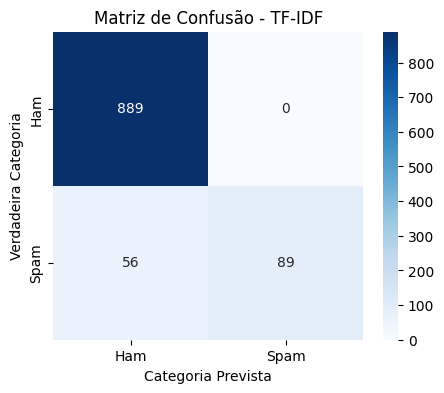

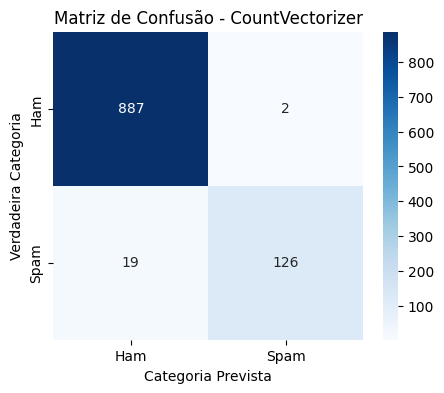

['naive_bayes_cv_desbalanced.pkl']

In [ ]:
# Dividindo o dataset em dados de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(df['clean_message'], df['label'], test_size=0.2, random_state=SEED)

# Extração de características (features) utilizando TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))  # Aplicando a extração de termos individuais e combinações de duas palavras seguidas
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("------ Métricas de Avaliação dos Modelos: ------")

# Naive Bayes Multinomial com TF-IDF
print("\nNaive Bayes Multinomial (TF-IDF):")
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = mnb_tfidf.predict(X_test_tfidf)

# Avaliação do Modelo
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("\nMétricas de Classificação:\n", classification_report(y_test, y_pred_tfidf))


# Extração de características (features) utilizando CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))  # Aplicando a extração de termos individuais e combinações de duas palavras seguidas
X_train_cv = count_vectorizer.fit_transform(X_train)
X_test_cv = count_vectorizer.transform(X_test)

# Naive Bayes Multinomial com CountVectorizer
print("\nNaive Bayes Multinomial (CountVectorizer):")
mnb_cv = MultinomialNB()
mnb_cv.fit(X_train_cv, y_train)
y_pred_cv = mnb_cv.predict(X_test_cv)

# Avaliação do Modelo
print("Accuracy:", accuracy_score(y_test, y_pred_cv))
print("\nMétricas de Classificação:\n", classification_report(y_test, y_pred_cv))

print("\n\n------ Gráficos com os resultados dos Modelos: ------\n")

# Gráfico da Matriz de Confusão para TF-IDF
plot_confusion_matrix(y_test, y_pred_tfidf, "Matriz de Confusão - TF-IDF")
print()

# Gráfico da Matriz de Confusão para CountVectorizer
plot_confusion_matrix(y_test, y_pred_cv, "Matriz de Confusão - CountVectorizer")

# Salva o modelo com TF-IDF
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer_desbalanced.pkl')
joblib.dump(mnb_tfidf, 'naive_bayes_tfidf_desbalanced.pkl')

# Salva o modelo com CountVectorizer
joblib.dump(count_vectorizer, 'count_vectorizer_desbalanced.pkl')
joblib.dump(mnb_cv, 'naive_bayes_cv_desbalanced.pkl')

### Top Features

Encontramos e representamos graficamente os 10 termos mais comuns no conjunto de dados, utilizando as técnicas CountVectorizer e TfidfVectorizer para a extração de palavras.

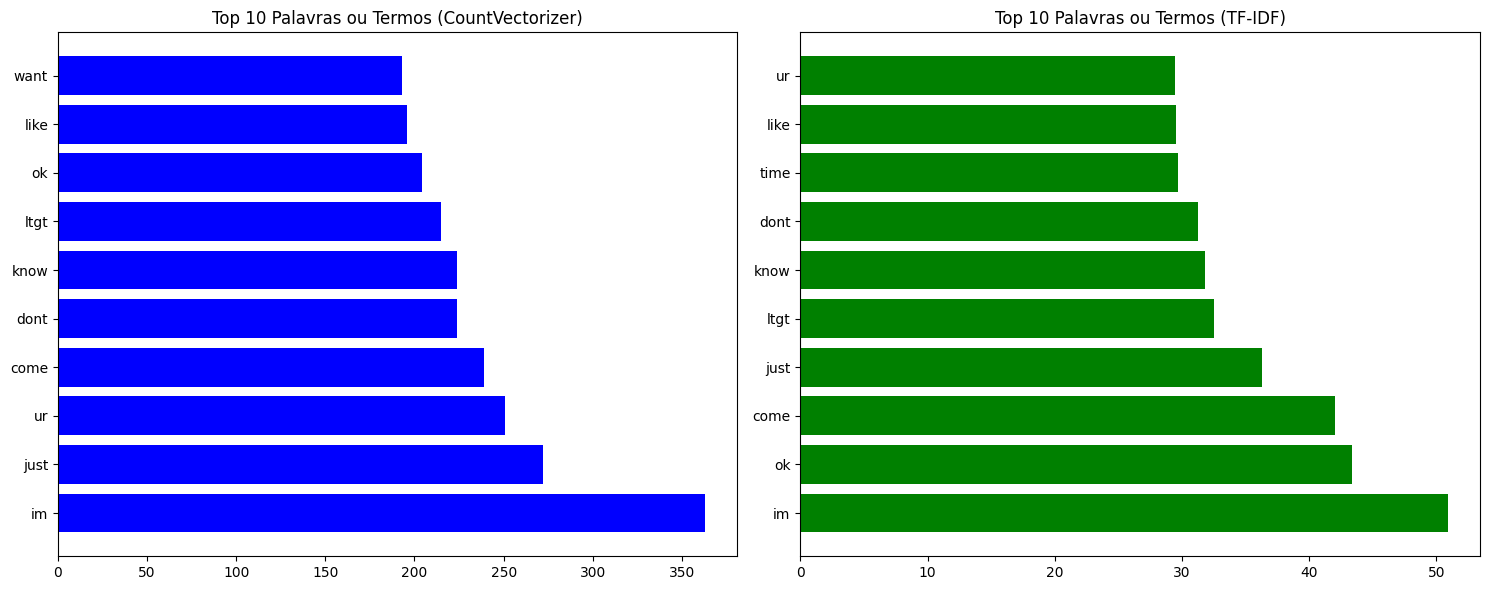

In [ ]:
# Coleta das principais palavras utilizadas com CountVectorizer
count_terms = count_vectorizer.get_feature_names_out()
count_word_freq = X_train_cv.sum(axis=0).A1
count_term_freq = list(zip(count_terms, count_word_freq))
count_term_freq = sorted(count_term_freq, key=lambda x: x[1], reverse=True)

# Coleta das principais palavras utilizadas com TfidfVectorizer
tfidf_terms = tfidf_vectorizer.get_feature_names_out()
tfidf_word_freq = X_train_tfidf.sum(axis=0).A1
tfidf_term_freq = list(zip(tfidf_terms, tfidf_word_freq))
tfidf_term_freq = sorted(tfidf_term_freq, key=lambda x: x[1], reverse=True)

# Geração dos gráficos com os 10 termos mais recorrentes, tanto com CountVectorizer quanto com TfidfVectorizer
top_count_terms = [x[0] for x in count_term_freq[:10]]
top_count_values = [x[1] for x in count_term_freq[:10]]

top_tfidf_terms = [x[0] for x in tfidf_term_freq[:10]]
top_tfidf_values = [x[1] for x in tfidf_term_freq[:10]]

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].barh(top_count_terms, top_count_values, color='b')
ax[0].set_title("Top 10 Palavras ou Termos (CountVectorizer)")

ax[1].barh(top_tfidf_terms, top_tfidf_values, color='g')
ax[1].set_title("Top 10 Palavras ou Termos (TF-IDF)")

plt.tight_layout()
plt.show()


### Balanceamento SMOTE

Utilizamos a técnica SMOTE para balancear as classes do conjunto de dados. Em seguida, aplicamos os vetorizadores TF-IDF e CountVectorizer para transformar os textos e treinar modelos Naive Bayes Multinomial, avaliando seu desempenho com os dados ajustados.

------ Métricas de Avaliação dos Modelos com SMOTE: ------

Naive Bayes Multinomial (TF-IDF) com SMOTE:
Accuracy: 0.9671179883945842

Métricas de Classificação:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       889
           1       0.84      0.95      0.89       145

    accuracy                           0.97      1034
   macro avg       0.91      0.96      0.94      1034
weighted avg       0.97      0.97      0.97      1034


Naive Bayes Multinomial (CountVectorizer) com SMOTE:
Accuracy: 0.9690522243713733

Métricas de Classificação:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       889
           1       0.87      0.91      0.89       145

    accuracy                           0.97      1034
   macro avg       0.93      0.94      0.94      1034
weighted avg       0.97      0.97      0.97      1034



------ Gráficos com os resultados dos Modelos com SMOTE: ------



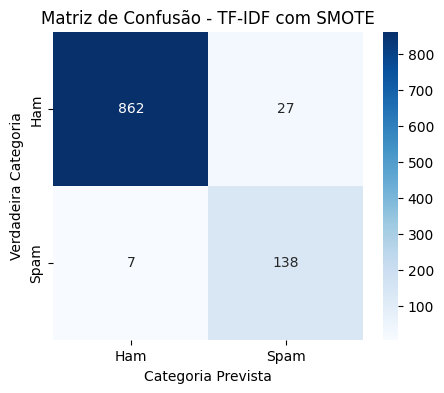

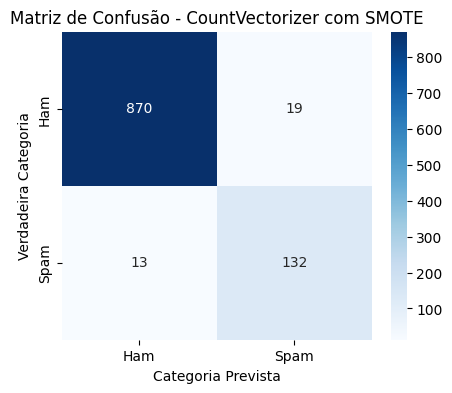

['naive_bayes_cv_smote.pkl']

In [ ]:
# Aplicando a técnica SMOTE para balancear os dados entre as categorias para o TfidfVectorizer
smote = SMOTE(random_state=SEED)
X_train_tfidf_resampled, y_train_tfidf_resampled = smote.fit_resample(X_train_tfidf, y_train)

print("------ Métricas de Avaliação dos Modelos com SMOTE: ------")

# Extração de características (features) utilizando TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))  # Aplicando a extração de termos individuais e combinações de duas palavras seguidas
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Naive Bayes Multinomial com TF-IDF
print("\nNaive Bayes Multinomial (TF-IDF) com SMOTE:")
mnb_tfidf_smote = MultinomialNB()
mnb_tfidf_smote.fit(X_train_tfidf_resampled, y_train_tfidf_resampled)
y_pred_mnb = mnb_tfidf_smote.predict(X_test_tfidf)

# Avaliação do Modelo
print("Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("\nMétricas de Classificação:\n", classification_report(y_test, y_pred_mnb))

# Extração de características (features) utilizando CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2)) # Aplicando a extração de termos individuais e combinações de duas palavras seguidas
X_train_cv = count_vectorizer.fit_transform(X_train)
X_test_cv = count_vectorizer.transform(X_test)

# Aplicando a técnica SMOTE para balancear os dados entre as categorias para o CountVectorizer
X_train_cv_resampled, y_train_cv_resampled = smote.fit_resample(X_train_cv, y_train)

# Naive Bayes Multinomial com CountVectorizer
print("\nNaive Bayes Multinomial (CountVectorizer) com SMOTE:")
mnb_cv_smote = MultinomialNB()
mnb_cv_smote.fit(X_train_cv_resampled, y_train_cv_resampled)
y_pred_cv = mnb_cv_smote.predict(X_test_cv)

# Avaliação do Modelo
print("Accuracy:", accuracy_score(y_test, y_pred_cv))
print("\nMétricas de Classificação:\n", classification_report(y_test, y_pred_cv))

print("\n\n------ Gráficos com os resultados dos Modelos com SMOTE: ------\n")

# Gráfico da Matriz de Confusão para TF-IDF com SMOTE
plot_confusion_matrix(y_test, y_pred_mnb, "Matriz de Confusão - TF-IDF com SMOTE")

# # Gráfico da Matriz de Confusão para CountVectorizer com SMOTE
plot_confusion_matrix(y_test, y_pred_cv, "Matriz de Confusão - CountVectorizer com SMOTE")

# Salva o modelo com TF-IDF
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer_smote.pkl')
joblib.dump(mnb_tfidf_smote, 'naive_bayes_tfidf_smote.pkl')

# Salva o modelo com CountVectorizer
joblib.dump(count_vectorizer, 'count_vectorizer_smote.pkl')
joblib.dump(mnb_cv_smote, 'naive_bayes_cv_smote.pkl')

## Deploy do Modelo

Salvamos e criamos uma função para a utilização dos modelos classificadores, baseados no algoritmo Naive Bayes Multinomial, treinados com TF-IDF e CountVectorizer, aplicando dados balanceados com SMOTE e desbalanceados.

In [ ]:
# Carregar vetorizador e modelos salvos (Selecione algum dos vetorizadores e modelos salvos, com suas correspondências)
tfidf_vectorizer_test = joblib.load('count_vectorizer_smote.pkl') # O vetorizador pode ser alterado de acordo com o modelo correspondente
mnb_tfidf_test = joblib.load('naive_bayes_cv_smote.pkl') # O modelo pode ser alterado de acordo com o vetorizador correspondente

# Função para classificara as mensagens entre SPAM e HAM
def message_classifier(text):
    try:

      # Carrega o texto em forma de lista (precisa estar em forma de lista)
      clean_text = [text]

      # Trata e transforma o texto com o vetorizador
      transformed_text = tfidf_vectorizer_test.transform(clean_text)

      # Aplica o modelo para fazer a previsão
      predict = mnb_tfidf_test.predict(transformed_text)

      # Mapeia o valor da predição para a categoria de mensagem
      if predict[0] == 0:
          return "Ham"
      else:
          return "Spam"

    except Exception as e:
        return f"Erro ao processar o texto: {e}"

Teste dos modelos com algumas mensagens de exemplo:

In [ ]:
# Exemplos de HAM e SPAM
ham_examples = [
    "Hey, are we still on for lunch today?",
    "Don’t forget to bring your laptop to the meeting tomorrow.",
    "Can you send me the notes from class?",
    "Let’s catch up this weekend!",
    "Meeting has been moved to 3 PM, just a heads up.",
    "Can you please review the attached document and send your feedback?",
    "Happy birthday! Hope you have an amazing day.",
    "Let me know if you need help with the project.",
    "I'll grab coffee on the way, want something?"
]

spam_examples = [
    "Congratulations! You’ve won a $1000 gift card. Click here to claim now!",
    "URGENT: Your account has been compromised. Verify your identity immediately.",
    "Exclusive offer: Get a brand-new iPhone for just $1!",
    "You’ve been selected for a free vacation. Respond now!",
    "Upgrade your credit score instantly with this new method!",
    "You have been pre-approved for a $10,000 loan!",
    "Unlock premium content with this special invitation code!",
    "This is your last chance to claim your prize!",
    "Your delivery failed. Please click the link to reschedule."
]

# Função para testar mensagens
def message_test(message, expected_type):
    print(f"\n\n--- Testando Mensagens '{expected_type}' ---\n")
    for msg in message:
        result = message_classifier(msg)
        print(f"[{result}] {msg}")

print("Realizando os testes...")

# Testando os exemplos
message_test(ham_examples, "HAM")
message_test(spam_examples, "SPAM")

Realizando os testes...


--- Testando Mensagens 'HAM' ---

[Ham] Hey, are we still on for lunch today?
[Ham] Don’t forget to bring your laptop to the meeting tomorrow.
[Ham] Can you send me the notes from class?
[Ham] Let’s catch up this weekend!
[Ham] Meeting has been moved to 3 PM, just a heads up.
[Ham] Can you please review the attached document and send your feedback?
[Ham] Happy birthday! Hope you have an amazing day.
[Ham] Let me know if you need help with the project.
[Ham] I'll grab coffee on the way, want something?


--- Testando Mensagens 'SPAM' ---

[Spam] Congratulations! You’ve won a $1000 gift card. Click here to claim now!
[Spam] URGENT: Your account has been compromised. Verify your identity immediately.
[Spam] Exclusive offer: Get a brand-new iPhone for just $1!
[Spam] You’ve been selected for a free vacation. Respond now!
[Spam] Upgrade your credit score instantly with this new method!
[Spam] You have been pre-approved for a $10,000 loan!
[Spam] Unlock premium cont